# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
import matplotlib


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [4]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print('--------------------')
print('Begin Data Retrieval')
print('--------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found...")
        pass

print('--------------------')
print('End Data Retrieval')
print('--------------------')

--------------------
Begin Data Retrieval
--------------------
Processing record 1 of set 0 | belyy yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 2 of set 0 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 3 of set 0 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 4 of set 0 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 5 of set 0 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 6 of set 0 | senno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 7 of set 0 | luderitz
http://api.openweathermap.org/data/2.5/weather?u

Processing record 8 of set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 9 of set 1 | honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 10 of set 1 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 11 of set 1 | sol-iletsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 12 of set 1 | ubauro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 13 of set 1 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 14 of set 1 | cam ranh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Pro

Processing record 14 of set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 15 of set 2 | nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 16 of set 2 | kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 17 of set 2 | pouebo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 18 of set 2 | cocorit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 19 of set 2 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 20 of set 2 | karkaralinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not 

Processing record 20 of set 3 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 21 of set 3 | pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 22 of set 3 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 23 of set 3 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 24 of set 3 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 25 of set 3 | warqla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 26 of set 3 | north bend
http://api.openweathermap.org/data/2.5/wea

Processing record 28 of set 4 | falealupo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 29 of set 4 | zhetybay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 30 of set 4 | boa vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 31 of set 4 | marshalltown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 32 of set 4 | taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 33 of set 4 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 34 of set 4 | bambous virieux
http://api.openweathermap.or

Processing record 35 of set 5 | matara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 36 of set 5 | beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 37 of set 5 | bargal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 38 of set 5 | golden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 39 of set 5 | floro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 40 of set 5 | iberia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 41 of set 5 | kindu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Proc

Processing record 44 of set 6 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 45 of set 6 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 46 of set 6 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 47 of set 6 | chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 48 of set 6 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 49 of set 6 | ribeira brava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 50 of set 6 | culver city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3


Processing record 50 of set 7 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 0 of set 8 | hunza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 1 of set 8 | sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 2 of set 8 | ust-ordynskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 3 of set 8 | utiroa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 4 of set 8 | artyom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 5 of set 8 | mago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62

Processing record 5 of set 9 | qujing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 6 of set 9 | staraya poltavka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 7 of set 9 | marv dasht
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 8 of set 9 | kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 9 of set 9 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 10 of set 9 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 11 of set 9 | balingasay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b

Processing record 12 of set 10 | zlatoustovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 13 of set 10 | high level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 14 of set 10 | fuengirola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 15 of set 10 | oriximina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 16 of set 10 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 17 of set 10 | ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 18 of set 10 | stantsionno-oyashinskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing record 18 of set 11 | yantal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 19 of set 11 | ariquemes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 20 of set 11 | mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 21 of set 11 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 22 of set 11 | olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 23 of set 11 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
Processing record 24 of set 11 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3

Processing record 25 of set 12 | we
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
City not found...
Processing record 26 of set 12 | adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b424139f58e0538f62e0225c970d39d3
--------------------
End Data Retrieval
--------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          582
Cloudiness    582
Country       582
Date          582
Humidity      582
Temp          582
Lat           582
Lng           582
Wind Speed    582
dtype: int64

In [6]:

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,belyy yar,99,RU,1580272488,85,14.00,53.60,91.39,4.47
1,cape town,75,ZA,1580272266,100,68.00,-33.93,18.42,10.29
2,vestmannaeyjar,0,IS,1580272489,69,34.38,63.44,-20.27,10.22
3,bluff,98,NZ,1580272489,87,55.99,-46.60,168.33,11.01
4,busselton,16,AU,1580272489,29,84.00,-33.65,115.33,14.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# Set variable for output file
output_file = os.path.join('..', 'output_data', 'cities.csv')
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

In [8]:
date =datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')

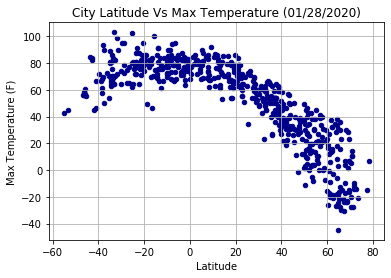

In [9]:
weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("../Images/LatitudeVsTemperature.png")

In [10]:
## The above scatter plot shows how the further away the city is from the equator (O Degrees), the lower their maximum tempterature.

#### Latitude vs. Humidity Plot

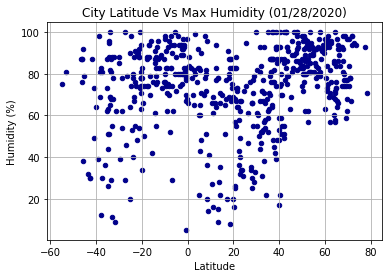

In [11]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsHumidity.png")

In [12]:
##This scatter plot shows the relationship between the latitude of a city in relation to its humidity (%). It does not look like an direct correlation can be assumed.

#### Latitude vs. Cloudiness Plot

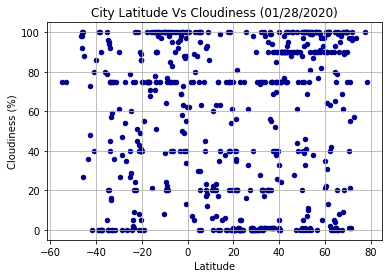

In [13]:
# Latitude Vs Cloudiness

weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsCloudiness.png")

In [14]:
## This scatter plot shows that there is no direct relationship between a city's latitude and its cloudiness.

#### Latitude vs. Wind Speed Plot

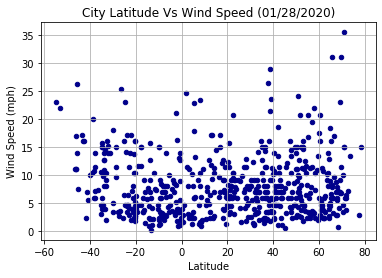

In [15]:
# Latitude Vs Wind Speed

weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../Images/LatitudeVsWindSpeed.png")

In [16]:
##The above scatter plot compares a city's latitude with its wind speed. It does not look like any conclusion can be drawn from this information.

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots


In [18]:
# Create Northern and Southern Hemisphere DataFrames
North_Hem_df = weather_data.loc[weather_data['Lat'] >= 0, :]
South_Hem_df = weather_data.loc[weather_data['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8848310745175696


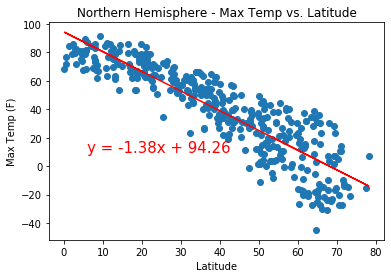

<Figure size 432x288 with 0 Axes>

In [19]:
#Create the linear regression for the cities' max temperature vs. the northern latitudes
x = North_Hem_df['Lat']
y = North_Hem_df['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

plt.show()
plt.savefig('NMaxtempLatitude.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3592268500844804


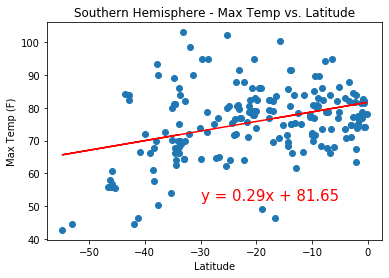

<Figure size 432x288 with 0 Axes>

In [20]:
#Create the linear regression for the cities' max temperature vs. the southern latitudes
x = South_Hem_df['Lat']
y = South_Hem_df['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq, xy=(-50, 60), xytext=(-30, 52), fontsize=15,color="red")

plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

plt.show()
plt.savefig('SMaxtempLatitude.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4121240125929137


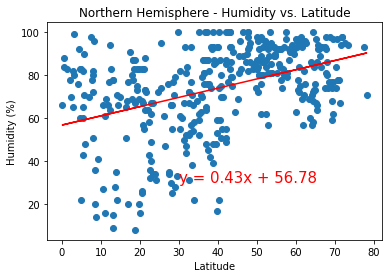

<Figure size 432x288 with 0 Axes>

In [21]:
#Create the linear regression for the cities' humidity vs. the northern latitudes
x = North_Hem_df['Lat']
y = North_Hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()
plt.savefig('NHumidLatitude.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3027219680676179


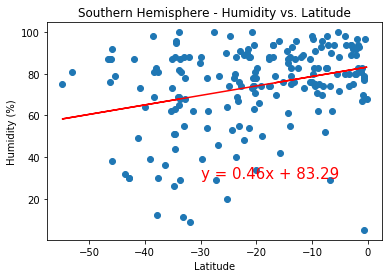

<Figure size 432x288 with 0 Axes>

In [22]:
#Create the linear regression for the cities' humidity vs. the southern latitudes
x = South_Hem_df['Lat']
y = South_Hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq, xy=(-50, 60), xytext=(-30, 30), fontsize=15,color="red")

plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()
plt.savefig('SHumidLatitude.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2552365043963284


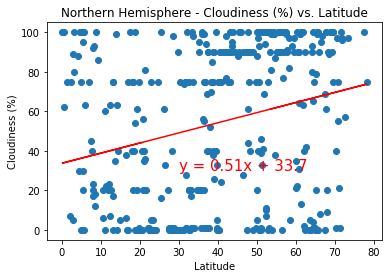

<Figure size 432x288 with 0 Axes>

In [23]:
#Create the linear regression for the cities' cloudiness vs. the northern latitudes
x = North_Hem_df['Lat']
y = North_Hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()
plt.savefig('NCloudLatitude.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25281879216191655


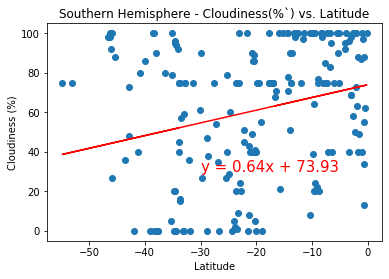

<Figure size 432x288 with 0 Axes>

In [24]:
x = South_Hem_df['Lat']
y = South_Hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq, xy=(-50, 60), xytext=(-30, 30), fontsize=15,color="red")

plt.title('Southern Hemisphere - Cloudiness(%`) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()
plt.savefig('SCloudLatitude.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08309038570655594


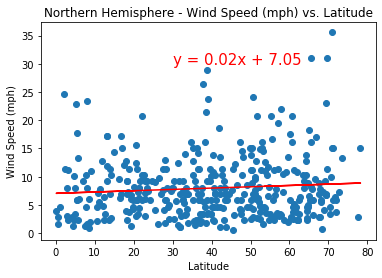

<Figure size 432x288 with 0 Axes>

In [25]:

#Create the linear regression for the cities' wind speed vs. the northern latitudes
x = North_Hem_df['Lat']
y = North_Hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()
plt.savefig('NWindLatitude.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4064180659340826


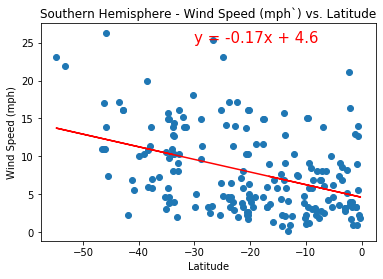

<Figure size 432x288 with 0 Axes>

In [26]:
#Create the linear regression for the cities' wind speed vs. the southern latitudes
x = South_Hem_df['Lat']
y = South_Hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq, xy=(-50, 20), xytext=(-30, 25), fontsize=15,color="red")

plt.title('Southern Hemisphere - Wind Speed (mph`) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()
plt.savefig('SCloudLatitude.png')